Clone Files from Github

In [0]:
!git clone https://github.com/henriquefps/SOM_NeuralNetwork.git
  
import nltk
nltk.download("popular")


fatal: destination path 'SOM_NeuralNetwork' already exists and is not an empty directory.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /roo

True

Importing DB from CSV

In [0]:
import csv

dataset = []
column_names = []

with open('SOM_NeuralNetwork/tmdb_5000_movies.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    
    dataset = [row for row in csv_reader]
    column_names = dataset[0]
    
    print (column_names)
    
    mlist = []
    for j, data in enumerate(dataset):
      if(j == 0): continue
      newdict = {}
      for i, column in enumerate(data):
        newdict[column_names[i]] = column
      mlist.append(newdict)
      
    dataset = mlist
    
    print(dataset[0])
    print(len(dataset))

['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']
{'budget': '237000000', 'genres': '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]', 'homepage': 'http://www.avatarmovie.com/', 'id': '19995', 'keywords': '[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "mari

Get all movies overview

In [0]:
corpus = []
labels = []
genres = []

labeled_elements = zip(labels, corpus)

for data in dataset:
  corpus.append(data['overview'])
  labels.append(data['title'])
  genres.append(data['genres'])
  
print(labels[0] + corpus[0])

AvatarIn the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.


Defining text tokenize

In [0]:
import string
def tokens(text):
  def stop_words(sent):
      stop = set(nltk.corpus.stopwords.words('english'))
      notStop = []
      pont = string.punctuation
      pont = list(pont)
      pont = pont + ["n't", '--', "'", '-', '...', "''", "``", "'re"]
      l = nltk.stem.WordNetLemmatizer()
      for w in sent:
          w = l.lemmatize(w)
          if w not in stop:
              if w not in pont:
                  notStop.append(w)
      return notStop

  def tokenize(text):
    return nltk.word_tokenize(text)
  
  return stop_words(tokenize(text))

print(tokens("hello my friends, how you all doing isn't"))

['hello', 'friend']


Counting tokens frequency at corpus

In [0]:
count_tf = {}
def append_strings(words):
  r = ""
  for x in words:
    r = r + tokens(x)[0]
  return r

def process_genres(genre):
  l1 = genre.split("}")
  x = len(l1) -1
  l1 = l1[0:x]
  l2 = [append_strings(x.split('"name": ')[1].split(' ')) for x in l1]
  return l2
  
print(process_genres(genres[0]))
genres_dict = {}
for i, genre in enumerate(genres):
  str_app = " "
  for g in process_genres(genre):
    if g in genres_dict:
      genres_dict[g] = genres_dict[g] + 1
    else:
      genres_dict[g] = 1
    str_app = str_app + g + " "
    
  corpus[i] = corpus[i] + str_app

for sentence in corpus:
  for token in tokens(sentence):
    if token in count_tf:
      count_tf[token] = count_tf[token] + 1
    else:
      count_tf[token] = 1

      
print(len(count_tf))


['Action', 'Adventure', 'Fantasy', 'ScienceFiction']
23724


Sort tokens by frequency

In [0]:
from operator import itemgetter

sort_tokens = sorted([[token, count_tf[token]] for token in count_tf], key=itemgetter(1))
print(len(sort_tokens))


23724


Filtering most frequent and less frequent words

In [0]:
print(sort_tokens[len(sort_tokens)-1])
most_freq_token = sort_tokens[len(sort_tokens)-1]

max_frequency = int(0.98*most_freq_token[1])
min_frequency = int(0.02*most_freq_token[1])

print(max_frequency)
print(min_frequency)

med_tokens = [token for token in sort_tokens if token[1] >= min_frequency and token[1] <= max_frequency or token[1] in genres_dict]

print (med_tokens[0])
print(len(med_tokens))

corpus_tf = {}
for token in med_tokens:
  corpus_tf[token[0]] = token[1]
  
print(corpus_tf)

for x in genres_dict:
  print(x)


["'s", 2646]
2593
52
['unexpected', 52]
473
{'unexpected': 52, 'ruthless': 52, 'rise': 52, 'cause': 52, 'writer': 52, 'result': 52, 'assassin': 52, 'doctor': 52, 'call': 52, 'lover': 52, 'law': 52, 'terrorist': 53, 'quickly': 53, 'use': 53, 'lie': 53, 'novel': 53, 'hold': 53, 'George': 53, 'final': 53, 'rival': 53, 'five': 53, 'class': 53, 'lawyer': 53, 'alive': 54, 'realizes': 54, 'free': 54, 'taking': 54, 'Sam': 54, 'scientist': 54, 'enough': 54, 'role': 54, 'crash': 54, 'mean': 54, 'village': 54, 'making': 54, 'vampire': 54, 'determined': 54, 'trouble': 54, 'romantic': 54, 'Peter': 55, 'far': 55, 'killing': 55, 'Nick': 55, 'arrives': 55, 'entire': 55, 'train': 55, 'murdered': 55, 'anything': 55, 'leave': 55, 'II': 55, 'Her': 55, 'stranger': 55, 'California': 55, 'Tom': 55, 'During': 55, 'epic': 56, 'fear': 56, 'inside': 56, 'bad': 56, 'French': 56, 'Three': 56, 'late': 57, 'military': 57, 'seemingly': 57, 'caught': 57, 'artist': 57, 'since': 57, 'At': 57, 'target': 57, 'destroy': 57

In [0]:
def get_input_vector(sentence, corpus_tf):
  def corpus_genres_or_none(sentence, token):
    ret = 0
    if token in sentence:
      if token in genres_dict:
        ret = 4
      else:
        ret = 1
    return ret
    
  sentence = tokens(sentence)
  return [corpus_genres_or_none(sentence, token) for token in corpus_tf] 
  
input_vectors = [get_input_vector(sent, corpus_tf) for sent in corpus]
print(len(input_vectors))

4803


In [0]:
print(input_vectors[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random as ran


class SOM(object):
    """
    2-D Self-Organizing Map with Gaussian Neighbourhood function
    and linearly decreasing learning rate.
    """

    #To check if the SOM has been trained
    _trained = False

    def __init__(self, m, n, dim, n_iterations=100, alpha=None, sigma=None):
        """
        Initializes all necessary components of the TensorFlow
        Graph.

        m X n are the dimensions of the SOM. 'n_iterations' should
        should be an integer denoting the number of iterations undergone
        while training.
        'dim' is the dimensionality of the training inputs.
        'alpha' is a number denoting the initial time(iteration no)-based
        learning rate. Default value is 0.3
        'sigma' is the the initial neighbourhood value, denoting
        the radius of influence of the BMU while training. By default, its
        taken to be half of max(m, n).
        """

        #Assign required variables first
        self._m = m
        self._n = n
        if alpha is None:
            alpha = 0.3
        else:
            alpha = float(alpha)
        if sigma is None:
            sigma = max(m, n) / 2.0
        else:
            sigma = float(sigma)
        self._n_iterations = abs(int(n_iterations))

        ##INITIALIZE GRAPH
        self._graph = tf.Graph()

        ##POPULATE GRAPH WITH NECESSARY COMPONENTS
        with self._graph.as_default():

            ##VARIABLES AND CONSTANT OPS FOR DATA STORAGE

            #Randomly initialized weightage vectors for all neurons,
            #stored together as a matrix Variable of size [m*n, dim]
            self._weightage_vects = tf.Variable(tf.random_normal(
                [m*n, dim]))

            #Matrix of size [m*n, 2] for SOM grid locations
            #of neurons
            self._location_vects = tf.constant(np.array(
                list(self._neuron_locations(m, n))))

            ##PLACEHOLDERS FOR TRAINING INPUTS
            #We need to assign them as attributes to self, since they
            #will be fed in during training

            #The training vector
            self._vect_input = tf.placeholder("float", [dim])
            #Iteration number
            self._iter_input = tf.placeholder("float")

            ##CONSTRUCT TRAINING OP PIECE BY PIECE
            #Only the final, 'root' training op needs to be assigned as
            #an attribute to self, since all the rest will be executed
            #automatically during training

            #To compute the Best Matching Unit given a vector
            #Basically calculates the Euclidean distance between every
            #neuron's weightage vector and the input, and returns the
            #index of the neuron which gives the least value
            bmu_index = tf.argmin(tf.sqrt(tf.reduce_sum(
                tf.pow(tf.subtract(self._weightage_vects, tf.stack(
                    [self._vect_input for i in range(m*n)])), 2), 1)),
                                  0)

            #This will extract the location of the BMU based on the BMU's
            #index
            slice_input = tf.pad(tf.reshape(bmu_index, [1]),
                                 np.array([[0, 1]]))
            bmu_loc = tf.reshape(tf.slice(self._location_vects, slice_input, 
                        tf.constant(np.array([1, 2]), dtype=tf.int64) ), [2])

            #To compute the alpha and sigma values based on iteration
            #number
            learning_rate_op = tf.subtract(1.0, tf.div(self._iter_input,
                                                  self._n_iterations))
            _alpha_op = tf.multiply(alpha, learning_rate_op)
            _sigma_op = tf.multiply(sigma, learning_rate_op)

            #Construct the op that will generate a vector with learning
            #rates for all neurons, based on iteration number and location
            #wrt BMU.
            bmu_distance_squares = tf.reduce_sum(tf.pow(tf.subtract(
                self._location_vects, tf.stack(
                    [bmu_loc for i in range(m*n)])), 2), 1)
            neighbourhood_func = tf.exp(tf.negative(tf.div(tf.cast(
                bmu_distance_squares, "float32"), tf.pow(_sigma_op, 2))))
            learning_rate_op = tf.multiply(_alpha_op, neighbourhood_func)

            #Finally, the op that will use learning_rate_op to update
            #the weightage vectors of all neurons based on a particular
            #input
            learning_rate_multiplier = tf.stack([tf.tile(tf.slice(
                learning_rate_op, np.array([i]), np.array([1])), [dim])
                                               for i in range(m*n)])
            weightage_delta = tf.multiply(
                learning_rate_multiplier,
                tf.subtract(tf.stack([self._vect_input for i in range(m*n)]),
                       self._weightage_vects))                                         
            new_weightages_op = tf.add(self._weightage_vects,
                                       weightage_delta)
            self._training_op = tf.assign(self._weightage_vects,
                                          new_weightages_op)                                       

            ##INITIALIZE SESSION
            self._sess = tf.Session()

            ##INITIALIZE VARIABLES
            init_op = tf.global_variables_initializer()
            self._sess.run(init_op)

    def _neuron_locations(self, m, n):
        """
        Yields one by one the 2-D locations of the individual neurons
        in the SOM.
        """
        #Nested iterations over both dimensions
        #to generate all 2-D locations in the map
        for i in range(m):
            for j in range(n):
                yield np.array([i, j])

    def train(self, input_vects):
        """
        Trains the SOM.
        'input_vects' should be an iterable of 1-D NumPy arrays with
        dimensionality as provided during initialization of this SOM.
        Current weightage vectors for all neurons(initially random) are
        taken as starting conditions for training.
        """

        #Training iterations
        for iter_no in range(self._n_iterations):
            print("iter: " +str(iter_no) +"/" + str(self._n_iterations))
            #Train with each vector one by one
            for input_vect in input_vects:
                self._sess.run(self._training_op,
                               feed_dict={self._vect_input: input_vect,
                                          self._iter_input: iter_no})

        #Store a centroid grid for easy retrieval later on
        centroid_grid = [[] for i in range(self._m)]
        self._weightages = list(self._sess.run(self._weightage_vects))
        self._locations = list(self._sess.run(self._location_vects))
        for i, loc in enumerate(self._locations):
            centroid_grid[loc[0]].append(self._weightages[i])
        self._centroid_grid = centroid_grid

        self._trained = True

    def get_centroids(self):
        """
        Returns a list of 'm' lists, with each inner list containing
        the 'n' corresponding centroid locations as 1-D NumPy arrays.
        """
        if not self._trained:
            raise ValueError("SOM not trained yet")
        return self._centroid_grid

    def map_vects(self, input_vects):
        """
        Maps each input vector to the relevant neuron in the SOM
        grid.
        'input_vects' should be an iterable of 1-D NumPy arrays with
        dimensionality as provided during initialization of this SOM.
        Returns a list of 1-D NumPy arrays containing (row, column)
        info for each input vector(in the same order), corresponding
        to mapped neuron.
        """

        if not self._trained:
            raise ValueError("SOM not trained yet")

        to_return = []
        for vect in input_vects:
            min_index = min([i for i in range(len(self._weightages))],
                            key=lambda x: np.linalg.norm(vect-
                                                         self._weightages[x]))
            to_return.append(self._locations[min_index])
        
        return to_return

In [0]:
import numpy as np

X = 25
Y = 25

n_movies = 100

input_vectors = np.asarray(input_vectors[:n_movies])

som = SOM(X, Y, input_vectors.shape[1], 50, alpha=1)
som.train(input_vectors)     

W0625 17:22:20.420614 139712639682432 deprecation.py:323] From <ipython-input-10-fee9d6619dd5>:96: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


iter: 0/50
iter: 1/50
iter: 2/50
iter: 3/50
iter: 4/50
iter: 5/50
iter: 6/50
iter: 7/50
iter: 8/50
iter: 9/50
iter: 10/50
iter: 11/50
iter: 12/50
iter: 13/50
iter: 14/50
iter: 15/50
iter: 16/50
iter: 17/50
iter: 18/50
iter: 19/50
iter: 20/50
iter: 21/50
iter: 22/50
iter: 23/50
iter: 24/50
iter: 25/50
iter: 26/50
iter: 27/50
iter: 28/50
iter: 29/50
iter: 30/50
iter: 31/50
iter: 32/50
iter: 33/50
iter: 34/50
iter: 35/50
iter: 36/50
iter: 37/50
iter: 38/50
iter: 39/50
iter: 40/50
iter: 41/50
iter: 42/50
iter: 43/50
iter: 44/50
iter: 45/50
iter: 46/50
iter: 47/50
iter: 48/50
iter: 49/50


[array([24,  9]), array([24,  5]), array([13, 14]), array([ 0, 21]), array([16, 21]), array([24,  2]), array([0, 8]), array([21, 20]), array([11,  3]), array([24,  3]), array([24, 14]), array([ 3, 24]), array([21,  6]), array([17, 13]), array([22, 11]), array([14,  3]), array([17, 24]), array([19,  5]), array([ 9, 16]), array([20,  8]), array([24,  0]), array([14, 11]), array([17,  2]), array([17,  2]), array([ 1, 16]), array([ 0, 18]), array([14, 21]), array([12, 24]), array([ 7, 22]), array([ 5, 24]), array([24,  6]), array([16, 23]), array([13,  0]), array([ 8, 24]), array([0, 9]), array([14, 18]), array([20, 18]), array([12,  3]), array([24,  0]), array([19, 24]), array([0, 1]), array([10, 24]), array([2, 4]), array([ 8, 19]), array([10, 12]), array([ 4, 18]), array([24, 16]), array([15, 24]), array([11,  8]), array([ 0, 14]), array([17,  7]), array([12, 19]), array([24, 22]), array([18, 11]), array([5, 0]), array([7, 6]), array([22, 22]), array([0, 7]), array([ 0, 24]), array([24,

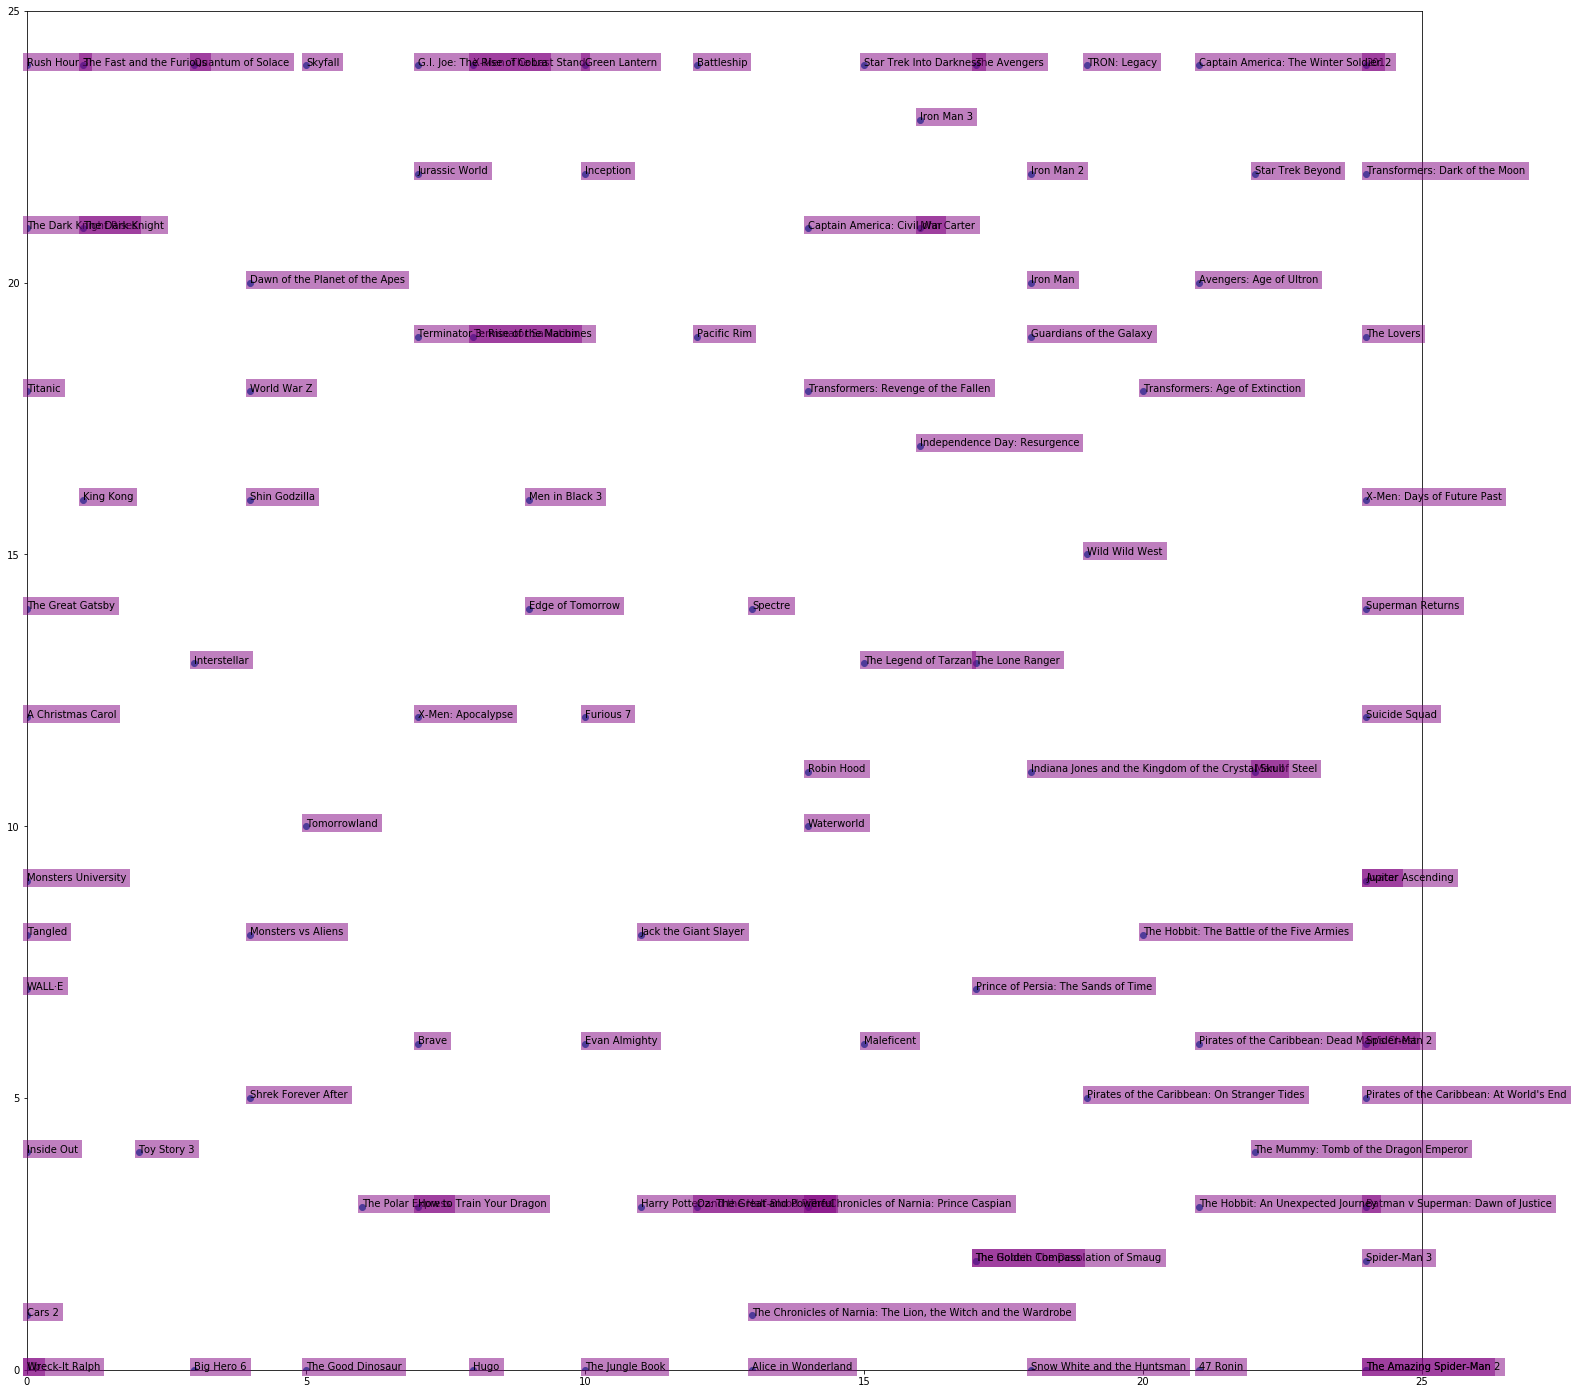

In [0]:
index = [r for r in labels[0:n_movies]]
index = list(map(str, index))

mapped = som.map_vects(input_vectors)
mappedarr = np.array(mapped)
x1 = mappedarr[:,0]; y1 = mappedarr[:,1]

plt.figure(1, figsize=(X, Y))

plt.scatter(x1,y1)

plt.axis([0, X, 0, Y])

print(mapped)
for i, m in enumerate(mapped):
    plt.text(m[0], m[1],index[i], bbox=dict(facecolor='purple', alpha=0.5, lw=0))

plt.show()


In [0]:
file = "pick30x30_1.p"

In [0]:
import pickle

matrix = [[[] for y in range(Y)] for x in range(X)]

print(matrix)

for i, m in enumerate(mapped):
  matrix[m[0]][m[1]].append(index[i])
  
for line in matrix:
  print(line)
  
from google.colab import drive

drive.mount('/content/gdrive')

pickle.dump( matrix, open('/content/gdrive/My Drive/'+file, 'wb') )

matrix = []

matrix = pickle.load(open('/content/gdrive/My Drive/'+file, "rb" ) )

for line in matrix:
  print(line)

[[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 

In [0]:
import pickle
from google.colab import drive

drive.mount('/content/gdrive')

matrix = pickle.load(open('/content/gdrive/My Drive/'+file, "rb" ) )

movies = []
for i, line in enumerate(matrix):
  for j, l in enumerate(line):
    if(len(l) > 0):
      for e in l:
        movies.append([e, i, j])

print(movies)

from operator import itemgetter


# for line in matrix:
#   print(line)

import math

def get_recommendations(n, favorites):
  elements = []
  for f in favorites:
    for m in movies:
      if (m[0] == f):
        elements.append(m)
  
  print(elements)
  
  sumcx = 0
  sumcy = 0
  for e in elements:
    sumcx = sumcx + e[1]
    sumcy = sumcy + e[2]
  
  cx = sumcx/len(elements)
  cy = sumcy/len(elements)

  print(cx)
  print(cy)
  nearest_list = sorted(movies, key=lambda x: (x[1] - cx) ** 2 + (x[2] - cy) ** 2)
  return [x for x in nearest_list if x[0] not in favorites][: min(n, len(nearest_list)-len(favorites))]

for x in get_recommendations(50, ['Mad Max: Fury Road','Alice Through the Looking Glass','The Hunger Games: Mockingjay - Part 1','King Kong', 'Madagascar: Escape 2 Africa']):
  print(x[0])
print()

  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[['Up', 0, 0], ['Wreck-It Ralph', 0, 0], ['Cars 2', 0, 1], ['Inside Out', 0, 4], ['WALL·E', 0, 7], ['Tangled', 0, 8], ['Monsters University', 0, 9], ['A Christmas Carol', 0, 12], ['The Great Gatsby', 0, 14], ['Titanic', 0, 18], ['The Dark Knight Rises', 0, 21], ['Rush Hour 3', 0, 24], ['King Kong', 1, 16], ['The Dark Knight', 1, 21], ['The Fast and the Furious', 1, 24], ['Toy Story 3', 2, 4], ['Big Hero 6', 3, 0], ['Interstellar', 3, 13], ['Quantum of Solace', 3, 24], ['Shrek Forever After', 4, 5], ['Monsters vs Aliens', 4, 8], ['Shin Godzilla', 4, 16], ['World War Z', 4, 18], ['Dawn of the Planet of the Apes', 4, 20], ['The Good Dinosaur', 5, 0], ['Tomorrowland', 5, 10], ['Skyfall', 5, 24], ['The Polar Express', 6, 3], ['How to Train Your Dragon', 7, 3], ['Brave', 7, 6], ['X-Men: Apocalypse', 7, 12], ['Terminator 3: Rise of the Machines', 7, 19], ['Jurassi